# Coffee Quality Dataset Exploratory Data Analysis
## 1. Imports

In [78]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

## 2. Dataset
https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi?resource=download 

Датасет представляет собой данные о качестве кофе разных производителей, собранные Coffee Institute (https://database.coffeeinstitute.org/). Для каждой строки приведены в том числе оценки аромата, кислотности, сладости и других параметров кофе, а также общие оценки, данные кофейными дегустаторами.

In [79]:
path = 'arabica_data_cleaned.csv'
df = pd.read_csv(path, index_col='Unnamed: 0')

In [80]:
df.tail()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,...,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,jalapa,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,nuevo oriente,...,Green,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32
1312,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"April 28th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.00,1400.00,1400.00


Просмотр числа пропусков в разных колонках

In [50]:
df.isna().sum()

Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers                     1
Color     

Удаление колонок с большим количеством пропусков

In [81]:
df = df.drop(columns = ['Species', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 
       'unit_of_measurement',  'Grading.Date','Variety', 'Processing.Method',
       'Altitude', 'Bag.Weight', 'Number.of.Bags',
       'altitude_low_meters', 'altitude_high_meters'])

In [82]:
df.isna().sum()

Owner                     7
Country.of.Origin         1
Company                 209
Region                   57
Producer                230
In.Country.Partner        0
Harvest.Year             47
Owner.1                   7
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   216
Category.Two.Defects      0
altitude_mean_meters    227
dtype: int64

Удаление строк с пропусками

In [83]:
df = df.dropna()

Проверка достаточного количества оставшихся строк

In [84]:
df.shape

(772, 25)

Описание датасета

In [85]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,7.554171,7.499987,7.363070,7.513977,7.482461,7.470933,9.853018,9.846192,9.916127,7.452733,81.952409,0.097280,0.406736,0.176166,3.497409,1934.031364
std,0.401146,0.421834,0.424389,0.399868,0.386561,0.429955,0.578550,0.811756,0.574764,0.491746,3.981364,0.040379,2.127665,0.803721,5.115146,10381.776205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.170000,7.330000,7.330000,7.250000,10.000000,10.000000,10.000000,7.250000,81.080000,0.100000,0.000000,0.000000,0.000000,1100.000000
50%,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.420000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,10.000000,7.670000,83.500000,0.120000,0.000000,0.000000,4.000000,1550.000000
max,8.750000,8.830000,8.670000,8.750000,8.500000,8.580000,10.000000,10.000000,10.000000,10.000000,90.580000,0.170000,31.000000,11.000000,47.000000,190164.000000


Выделение нечисловых колонок и их переобозначение

In [86]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,Owner,Country.of.Origin,Company,Region,Producer,In.Country.Partner,Harvest.Year,Owner.1,Color
1,metad plc,Ethiopia,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,metad plc,Green
2,metad plc,Ethiopia,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,metad plc,Green
4,yidnekachew dabessa,Ethiopia,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,METAD Agricultural Development plc,2014,Yidnekachew Dabessa,Green
5,metad plc,Ethiopia,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,metad plc,Green
10,diamond enterprise plc,Ethiopia,diamond enterprise plc,"snnp/kaffa zone,gimbowereda",Diamond Enterprise Plc,METAD Agricultural Development plc,2014,Diamond Enterprise Plc,Green


In [87]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
    df.head() 

Выявление выбивающихся данных:
 - видно, что есть строки с нереалистичным значением altitude_mean_meters (> 11 000)
 - видно, что есть строка с нулевыми оценками сладости, аромата и прочего

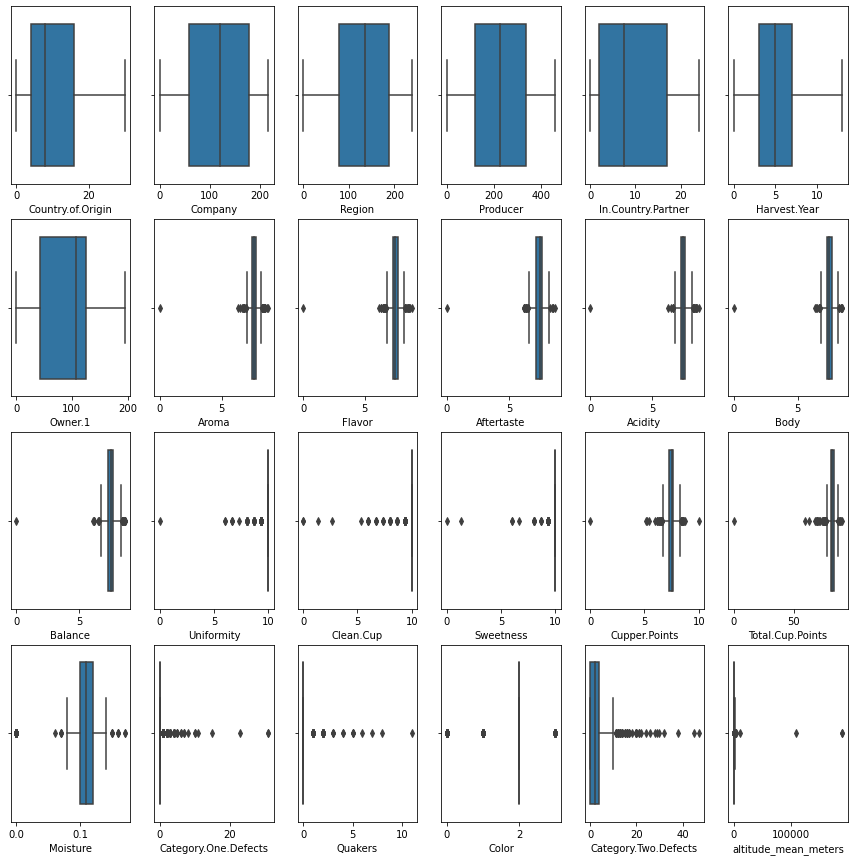

In [88]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 15))
count = 0
for idx, feature in enumerate(df.columns[1:]):
    sns.boxplot(x=df[feature], ax=axes[count // 6, count % 6])
    count += 1

In [89]:
for col in df.columns:    
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for Owner column: []

Outliers for Country.of.Origin column: []

Outliers for Company column: []

Outliers for Region column: []

Outliers for Producer column: []

Outliers for In.Country.Partner column: []

Outliers for Harvest.Year column: []

Outliers for Owner.1 column: []

Outliers for Aroma column: [6.92 6.83 6.92 6.83 6.92 6.92 6.75 6.83 6.83 6.83 6.83 6.5  6.33 6.92
 6.92 6.67 6.75 0.   8.67 8.75 8.25 8.42 8.5  8.42 8.5  8.33 8.25 8.33
 8.33 8.42 8.5  8.42 8.25]

Outliers for Flavor column: [6.67 6.75 6.75 6.5  6.75 6.58 6.5  6.75 6.33 6.5  6.5  6.17 6.33 6.58
 6.58 6.67 0.   8.83 8.67 8.58 8.5  8.58 8.25 8.25 8.25 8.5  8.33 8.42]

Outliers for Aftertaste column: [6.33 6.5  6.33 6.5  6.5  6.33 6.17 6.17 6.17 6.25 6.42 6.33 0.   8.67
 8.5  8.42 8.25 8.5 ]

Outliers for Acidity column: [6.67 6.67 6.5  6.67 6.25 0.   8.75 8.58 8.42 8.5  8.5  8.5  8.25 8.25
 8.25 8.33 8.33 8.33 8.33]

Outliers for Body column: [6.75 6.67 6.75 6.33 6.5  6.67 6.42 0.   8.5  8.42 8.5  8.42 8.

In [90]:
df.drop(df.loc[df['Body'] == 0].index, inplace = True )
df.drop(df.loc[df['altitude_mean_meters'] > 10000].index, inplace = True )

Визуализация очищенных данных. Приведены графики для целевого параметра - Total.Cup.Points

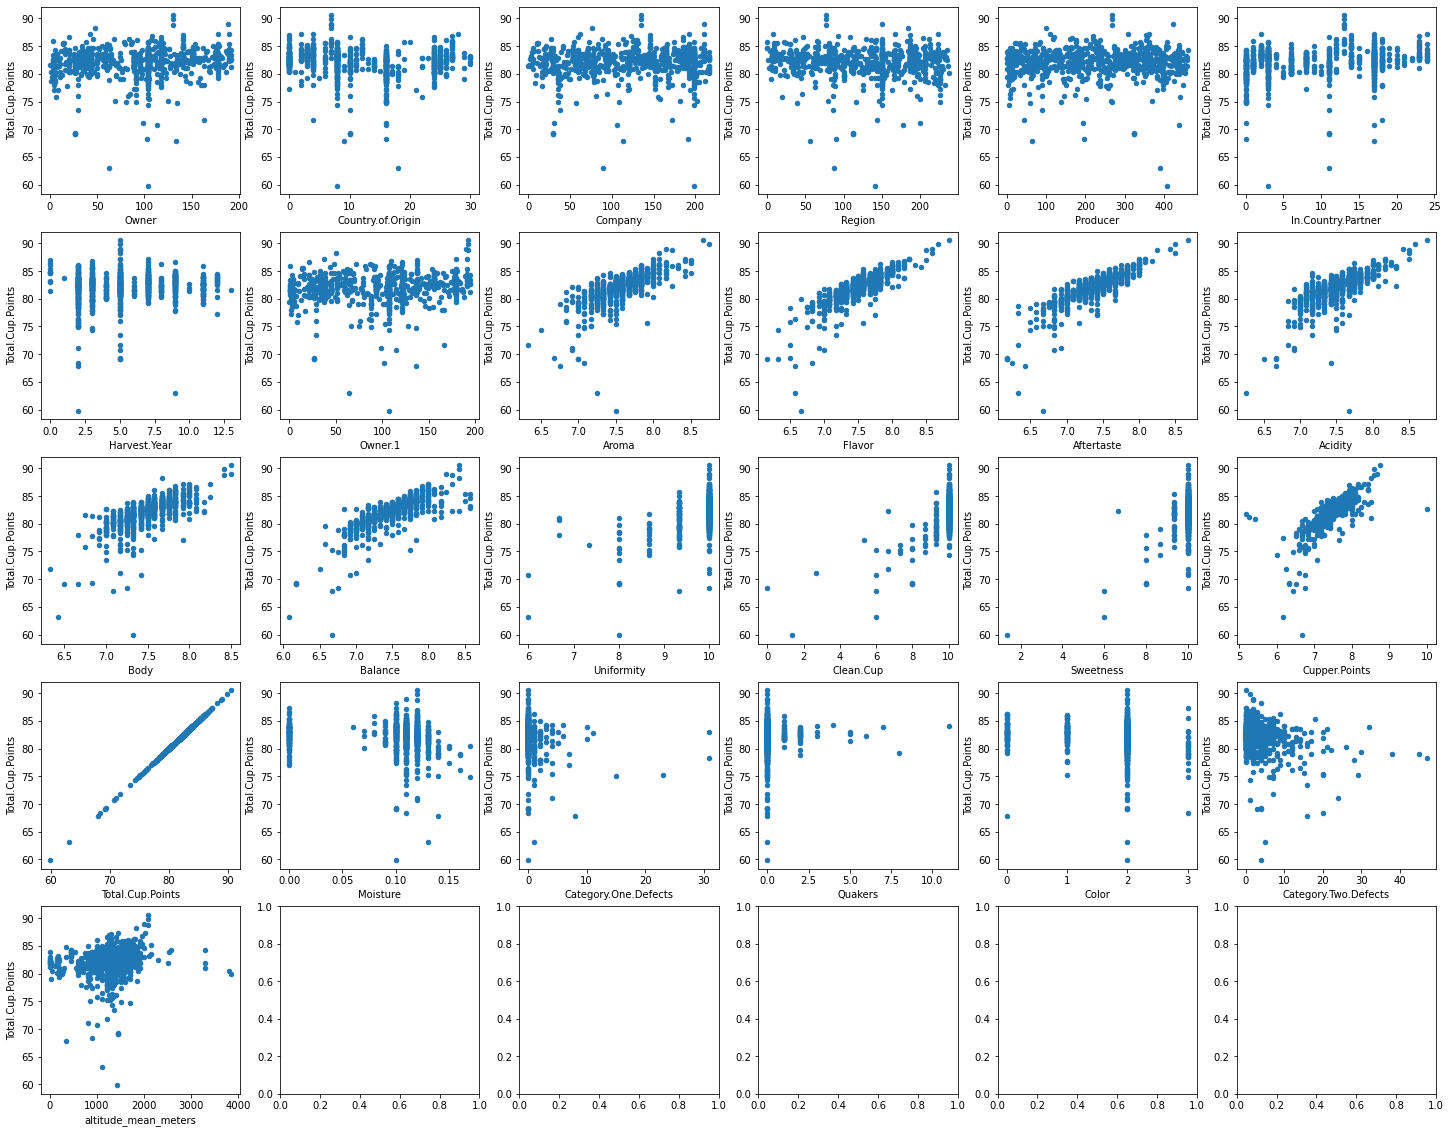

In [91]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Total.Cup.Points", subplots=True, kind="scatter", ax=axes[idx // 6, idx % 6])

Визуализация распределения оценок различных параметров кофе

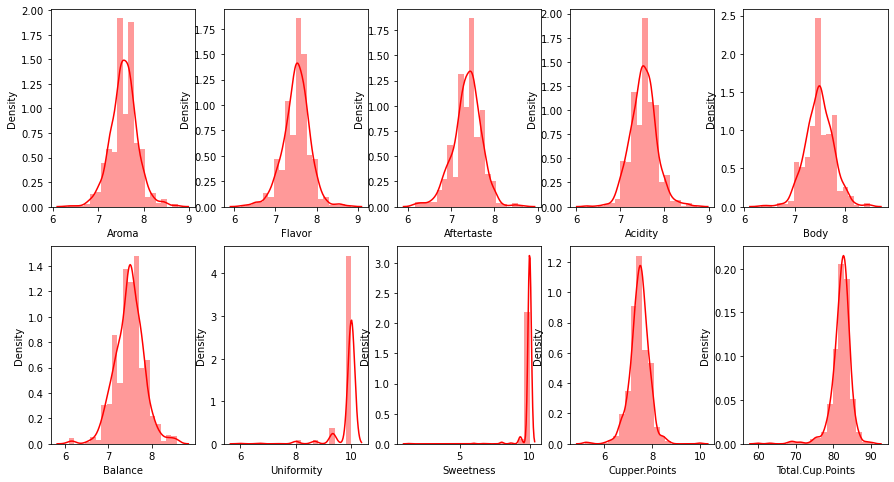

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
count = 0
for column in ['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Sweetness', 'Cupper.Points', 'Total.Cup.Points']:
    sns.distplot(df[column], bins=20, color='r', ax = axes[count// 5, count % 5])
    count += 1


Корреляции между разными параметрами: видно, что при подготовке данных пропущена колонка Owner.1, дублирующая колонку Owner.

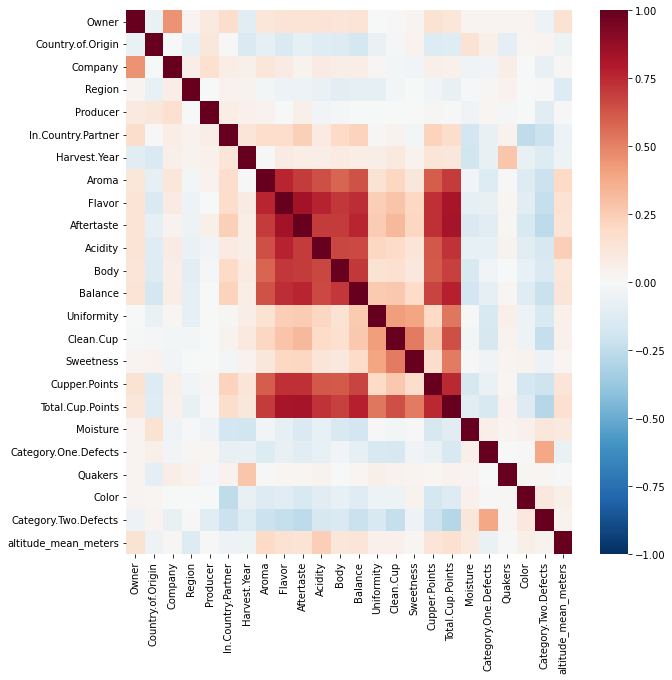

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(), cmap="RdBu_r", vmin = -1, vmax = 1);

In [94]:
df = df.drop(columns = ['Owner.1'])

In [95]:
num_cols = df.select_dtypes(exclude='object')
num_cols.columns

Index(['Owner', 'Country.of.Origin', 'Company', 'Region', 'Producer',
       'In.Country.Partner', 'Harvest.Year', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Color', 'Category.Two.Defects', 'altitude_mean_meters'],
      dtype='object')

## PCA(n_components=3)

In [96]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_cols)
df_scaled[:5]

array([[ 0.74293525, -0.52975937,  0.26134984, -0.74315443,  0.32542867,
         0.58807103, -0.12150976,  3.74984559,  4.06630516,  3.90869769,
         4.16262194,  3.63234575,  2.79584933,  0.29297479,  0.19256579,
         0.1564067 ,  3.11786962,  3.18394839,  0.56429241, -0.19193462,
        -0.21680811,  0.34303026, -0.68334862,  1.71272408],
       [ 0.74293525, -0.52975937,  0.26134984, -0.74315443,  0.32542867,
         0.58807103, -0.12150976,  4.02139651,  3.57330769,  3.39627552,
         3.58559373,  3.34396512,  2.79584933,  0.29297479,  0.19256579,
         0.1564067 ,  2.70607612,  2.93721992,  0.56429241, -0.19193462,
        -0.21680811,  0.34303026, -0.48748599,  1.71272408],
       [ 1.90465082, -0.52975937,  1.44626074,  0.39912903,  1.52151434,
         0.58807103, -0.12150976,  2.05265234,  3.29599661,  3.15513568,
         3.04250836,  3.63234575,  2.28970453,  0.29297479,  0.19256579,
         0.1564067 ,  2.92408444,  2.5932954 ,  0.31711236, -0.19193462,
  

In [97]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [98]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

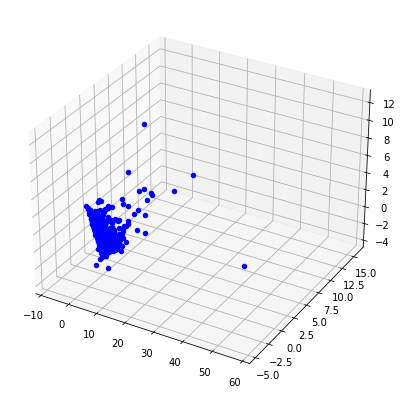

In [69]:
draw_3d(df_pca_3)

In [99]:
model = PCA(n_components=2)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[-9.84057606,  2.26520967],
       [-9.05948162,  2.12926067],
       [-8.05574739,  2.53819231],
       [-7.75026002,  1.82864289],
       [-6.77448594,  0.83707648]])

In [100]:
df_class = df['Total.Cup.Points']
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

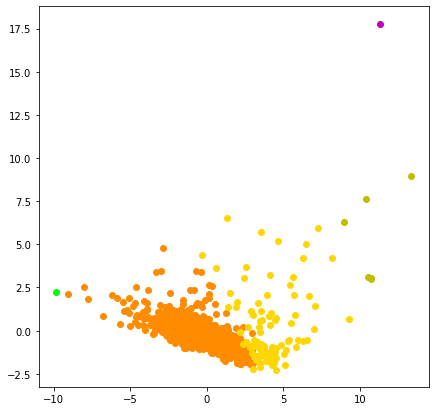

In [112]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], c=colors[int(f[1]['class']/10)]) # /10 to bring it to 0..10 range
    
plt.show()

In [108]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[-9.84057643,  2.26227815,  2.20147692],
       [-9.05948188,  2.12562514,  2.11462435],
       [-8.05574873,  2.54149402,  0.96535091],
       [-7.75026072,  1.82547247,  1.89493772],
       [-6.77448114,  0.82103731,  1.75897315]])

In [109]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})

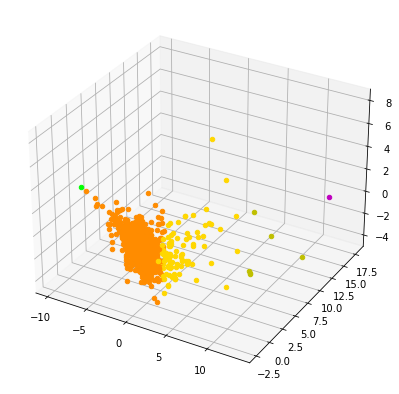

In [110]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class']/10)])
plt.show()